In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

2024-02-19 14:16:15.299637: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-19 14:16:15.330100: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-19 14:16:15.330135: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-19 14:16:15.330873: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-19 14:16:15.336387: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# Load CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Create simple CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

170498071/170498071 [==============================] - 112s 1us/step
Epoch 1/20
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5184 - accuracy: 0.4484 - val_loss: 1.2530 - val_accuracy: 0.5474
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1549 - accuracy: 0.5906 - val_loss: 1.0551 - val_accuracy: 0.6291
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9919 - accuracy: 0.6524 - val_loss: 0.9365 - val_accuracy: 0.6727
Epoch 4/20
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8982 - accuracy: 0.6855 - val_loss: 0.9074 - val_accuracy: 0.6848
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8247 - accuracy: 0.7106 - val_loss: 0.9456 - val_accuracy: 0.6764
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7612 - accuracy: 0.7317 - val_loss: 0.8388 - val_accuracy: 0.7111
Epoch 7/20
1563/1563 [==============================] - 11s 7

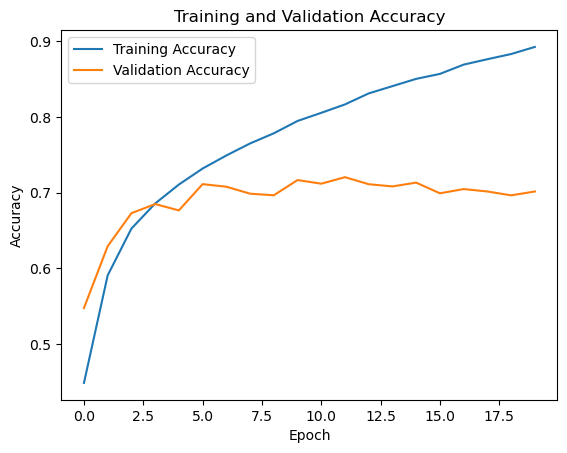

In [3]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
